In [21]:
#!/usr/bin/env python
# coding: utf-8

### Assignment 1<br>
<br>
Problem 3.3

In [22]:
from __future__ import print_function, division

In [1]:
import sys
sys.path.insert(0, '../ThinkDSP/code')#lazy way to import folder

In [2]:
import thinkdsp
import thinkplot
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from IPython.html.widgets import interact, fixed
from IPython.display import display

In [5]:
import math
PI2 = 2 * math.pi

Oveerride exisiting chirp since it does not take a frequency range only Ts

In [6]:
class SawtoothChirp(thinkdsp.Chirp):
    def _evaluate(self, ts, freqs):
        """
        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts)
        dps = PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

Sweep 

In [7]:
signal = SawtoothChirp(start=2500, end=3000)

Wave Duration

In [8]:
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

Plot 

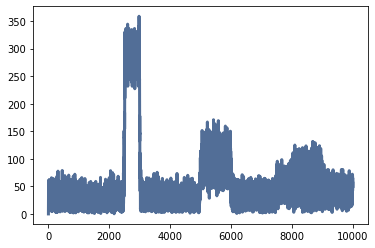

In [9]:
wave.make_spectrum().plot()